In [1]:
import numpy as np
from scipy.stats import norm
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
import pandas as pd

In [2]:
data = pd.read_csv('data/new_client_data.csv', header=[0,1], index_col=0)

In [3]:
data.head(2)

,l1,AP,AP.1,AP.2,AP.3,Association Time,Association Time.1,Association Time.2,Association Time.3,Association Time.4,...,Session Duration.3,Utilization,Utilization.1,Utilization.2,Utilization.3,Utilization.4,Utilization.5,Utilization.6,Utilization.7,Utilization.8
0,l2,IP Address,MAC Address,Map Location,Name,day,hour,minute,month,second,...,seconds,Avg. Session Throughput (Kbps),Bytes Received,Bytes Sent,Data Retries,Packets Received,Packets Sent,RSSI (dBm),RTS Retries,SNR (dB)
1,0,164.125.168.230,84:3d:c6:e6:51:20,Pusan > GunSul (401) > GunSul1F,16AP-401-1-1,30,18,2,7,1,...,1,<0.1,0,0,0,0,0,-78,0,17
2,1,164.125.168.230,84:3d:c6:e6:51:20,Pusan > GunSul (401) > GunSul1F,16AP-401-1-1,29,12,16,7,31,...,1,<0.1,0,0,0,0,0,-128,0,0


In [4]:
lib = data['AP.2']['Map Location'].str.contains('Lib')

In [5]:
data[lib]['AP.2']['Map Location'].value_counts()

Pusan > Lib-2 (420) > Lib-2-2F              96383
Pusan > Lib-2 (420) > Lib-2-3F              61767
Pusan > YounGu-Lib (510) > YounGu-Lib-4F    56125
Pusan > YounGu-Lib (510) > YounGu-Lib-1F    36858
Pusan > Lib-2 (420) > Lib-2-1F              31976
Pusan > YounGu-Lib (510) > YounGu-Lib-3F    23649
YangSan > Med-Lib > Med-lib_2F              19892
Pusan > YounGu-Lib (510) > YounGu-Lib-2F    15677
YangSan > Med-Lib > Med-lib_1F              13071
YangSan > Med-Lib > Med-lib_4F               3760
YangSan > Med-Lib > Med-lib_3F               1738
Name: Map Location, dtype: int64

In [6]:
set(data[lib]['AP.2']['Map Location'])

{'Pusan > Lib-2 (420) > Lib-2-1F',
 'Pusan > Lib-2 (420) > Lib-2-2F',
 'Pusan > Lib-2 (420) > Lib-2-3F',
 'Pusan > YounGu-Lib (510) > YounGu-Lib-1F',
 'Pusan > YounGu-Lib (510) > YounGu-Lib-2F',
 'Pusan > YounGu-Lib (510) > YounGu-Lib-3F',
 'Pusan > YounGu-Lib (510) > YounGu-Lib-4F',
 'YangSan > Med-Lib > Med-lib_1F',
 'YangSan > Med-Lib > Med-lib_2F',
 'YangSan > Med-Lib > Med-lib_3F',
 'YangSan > Med-Lib > Med-lib_4F'}

In [7]:
YounGu_Lib = data['AP.2']['Map Location'].str.contains('(510)')
Lib_2 = data['AP.2']['Map Location'].str.contains('(420)')

In [8]:
YounGu_Lib_df = data[YounGu_Lib]
Lib_2_df = data[Lib_2]

In [9]:
Lib_2_df.head()

,l1,AP,AP.1,AP.2,AP.3,Association Time,Association Time.1,Association Time.2,Association Time.3,Association Time.4,...,Session Duration.3,Utilization,Utilization.1,Utilization.2,Utilization.3,Utilization.4,Utilization.5,Utilization.6,Utilization.7,Utilization.8
0,l2,IP Address,MAC Address,Map Location,Name,day,hour,minute,month,second,...,seconds,Avg. Session Throughput (Kbps),Bytes Received,Bytes Sent,Data Retries,Packets Received,Packets Sent,RSSI (dBm),RTS Retries,SNR (dB)
6382081,6382080,172.20.140.111,44:e4:d9:40:b8:10,Pusan > Lib-2 (420) > Lib-2-1F,11S-420-1-1,13,8,41,4,9,...,26,1.4,194072,728687,219,802,1051,-61,0,32
6382082,6382081,172.20.140.111,44:e4:d9:40:b8:10,Pusan > Lib-2 (420) > Lib-2-1F,11S-420-1-1,13,8,21,4,3,...,5,1.1,117108,54766,38,194,175,-45,0,47
6382083,6382082,172.20.140.111,44:e4:d9:40:b8:10,Pusan > Lib-2 (420) > Lib-2-1F,11S-420-1-1,13,12,2,4,7,...,32,40.0,30835524,2366502,6553,25513,16043,-78,0,15
6382084,6382083,172.20.140.111,44:e4:d9:40:b8:10,Pusan > Lib-2 (420) > Lib-2-1F,11S-420-1-1,13,14,2,4,42,...,5,0.8,70997,52173,9048,229,256,-55,0,40
6382085,6382084,172.20.140.111,44:e4:d9:40:b8:10,Pusan > Lib-2 (420) > Lib-2-1F,11S-420-1-1,13,14,22,4,48,...,59,4.8,6623734,759365,9238,6785,4755,-67,0,23


In [10]:
Lib_2_df.columns

MultiIndex([(                   'l1',                             'l2'),
            (                   'AP',                     'IP Address'),
            (                 'AP.1',                    'MAC Address'),
            (                 'AP.2',                   'Map Location'),
            (                 'AP.3',                           'Name'),
            (     'Association Time',                            'day'),
            (   'Association Time.1',                           'hour'),
            (   'Association Time.2',                         'minute'),
            (   'Association Time.3',                          'month'),
            (   'Association Time.4',                         'second'),
            (   'Association Time.5',                           'year'),
            (               'Client',                 'Association ID'),
            (             'Client.1',                 'Authentication'),
            (             'Client.2',              

1. 건물층, throuput, 세션시간, rssi, ssid, (휴대폰)

In [11]:
tempLib2 = Lib_2_df

In [12]:
rel = ['Client.4','AP.2','Client.10','Utilization','Utilization.6','Session Duration','Session Duration.1','Session Duration.2','Session Duration.3']
tempLib2 = tempLib2[rel]

In [13]:
tempLib2

,Client.4,AP.2,Client.10,Utilization,Utilization.6,Session Duration,Session Duration.1,Session Duration.2,Session Duration.3
0,Endpoint Type,Map Location,SSID,Avg. Session Throughput (Kbps),RSSI (dBm),days,hours,minutes,seconds
6382081,Android,Pusan > Lib-2 (420) > Lib-2-1F,PNU-WiFi,1.4,-61,0,1,30,26
6382082,Android,Pusan > Lib-2 (420) > Lib-2-1F,PNU-WiFi,1.1,-45,0,0,20,5
6382083,Android,Pusan > Lib-2 (420) > Lib-2-1F,PNU-WiFi,40.0,-78,0,1,50,32
6382084,Android,Pusan > Lib-2 (420) > Lib-2-1F,PNU-WiFi,0.8,-55,0,0,20,5
6382085,Android,Pusan > Lib-2 (420) > Lib-2-1F,PNU-WiFi,4.8,-67,0,3,25,59
...,...,...,...,...,...,...,...,...,...
6572202,iPhone X,Pusan > Lib-2 (420) > Lib-2-3F,PNU-WiFi,214.7,-53,0,1,20,26
6572203,Linux-Workstation,Pusan > Lib-2 (420) > Lib-2-3F,PNU-WiFi,"4,605.9",-83,0,0,10,3
6572204,"iPhone11,8",Pusan > Lib-2 (420) > Lib-2-3F,PNU-WiFi,<0.1,-65,0,0,5,0


In [14]:
tempLib2.columns

MultiIndex([(          'Client.4',                  'Endpoint Type'),
            (              'AP.2',                   'Map Location'),
            (         'Client.10',                           'SSID'),
            (       'Utilization', 'Avg. Session Throughput (Kbps)'),
            (     'Utilization.6',                     'RSSI (dBm)'),
            (  'Session Duration',                           'days'),
            ('Session Duration.1',                          'hours'),
            ('Session Duration.2',                        'minutes'),
            ('Session Duration.3',                        'seconds')],
           names=[None, '0'])

In [15]:
totalsec = tempLib2['Session Duration']['days']*24*60*60 + tempLib2['Session Duration.1']['hours']*60*60 + tempLib2['Session Duration.2']['minutes']*60 + tempLib2['Session Duration.3']['seconds']

In [16]:
tempLib2.drop(['Session Duration','Session Duration.1','Session Duration.2'], axis=1, inplace=True)

In [17]:
tempLib2['Session Duration.3'] = totalsec

In [18]:
tempLib2

,Client.4,AP.2,Client.10,Utilization,Utilization.6,Session Duration.3
0,Endpoint Type,Map Location,SSID,Avg. Session Throughput (Kbps),RSSI (dBm),seconds
6382081,Android,Pusan > Lib-2 (420) > Lib-2-1F,PNU-WiFi,1.4,-61,5426
6382082,Android,Pusan > Lib-2 (420) > Lib-2-1F,PNU-WiFi,1.1,-45,1205
6382083,Android,Pusan > Lib-2 (420) > Lib-2-1F,PNU-WiFi,40.0,-78,6632
6382084,Android,Pusan > Lib-2 (420) > Lib-2-1F,PNU-WiFi,0.8,-55,1205
6382085,Android,Pusan > Lib-2 (420) > Lib-2-1F,PNU-WiFi,4.8,-67,12359
...,...,...,...,...,...,...
6572202,iPhone X,Pusan > Lib-2 (420) > Lib-2-3F,PNU-WiFi,214.7,-53,4826
6572203,Linux-Workstation,Pusan > Lib-2 (420) > Lib-2-3F,PNU-WiFi,"4,605.9",-83,603
6572204,"iPhone11,8",Pusan > Lib-2 (420) > Lib-2-3F,PNU-WiFi,<0.1,-65,300


In [19]:
cnt=1
for i,j in tempLib2.columns:
    if tempLib2[i][j].dtype == 'object':
        print(str(cnt) +") <" + i+" " +j,">")
        print(tempLib2[i][j].value_counts())
        print()
        cnt+=1

1) <Client.4 Endpoint Type >
Linux-Workstation               33667
Apple-iPhone                    19756
Android                         13802
iPhone 7                        13337
Android-Samsung                 13009
Android-Samsung-Galaxy-Phone    11739
iPhone 8                        11511
Microsoft-Workstation            8756
none                             8455
iPhone11,8                       6983
Unclassified                     6744
Apple-iPad                       6562
iPhone11,2                       5627
Android-LG                       4721
iPhone X                         4376
iPad7,5                          4329
Samsung-Device                   2496
iPhone 7+                        2282
iPhone 8+                        2038
iPhone12,1                       1572
iPhone11,6                       1243
iPad11,3                         1001
iPad Pro 2017 (10.5 inch)         883
iPad8,1                           825
Workstation                       801
Apple-Device         

In [20]:
lib2 = tempLib2

In [21]:
lib2['AP.2'] = lib2['AP.2']['Map Location'].map({'Pusan > Lib-2 (420) > Lib-2-1F':1, 'Pusan > Lib-2 (420) > Lib-2-2F':2, 'Pusan > Lib-2 (420) > Lib-2-3F':3})

In [22]:
lib2['Utilization'] = lib2['Utilization']['Avg. Session Throughput (Kbps)'].replace(['<0.1'],['0.05'])
lib2['Utilization'] = lib2['Utilization']['Avg. Session Throughput (Kbps)'].str.replace(',', '').astype('float64')
lib2['Utilization']['Avg. Session Throughput (Kbps)'].astype('float64')

6382081       1.40
6382082       1.10
6382083      40.00
6382084       0.80
6382085       4.80
            ...   
6572202     214.70
6572203    4605.90
6572204       0.05
6572205     270.50
6572206     310.40
Name: Avg. Session Throughput (Kbps), Length: 190126, dtype: float64

In [23]:
lib2

,Client.4,AP.2,Client.10,Utilization,Utilization.6,Session Duration.3
0,Endpoint Type,Map Location,SSID,Avg. Session Throughput (Kbps),RSSI (dBm),seconds
6382081,Android,1,PNU-WiFi,1.40,-61,5426
6382082,Android,1,PNU-WiFi,1.10,-45,1205
6382083,Android,1,PNU-WiFi,40.00,-78,6632
6382084,Android,1,PNU-WiFi,0.80,-55,1205
6382085,Android,1,PNU-WiFi,4.80,-67,12359
...,...,...,...,...,...,...
6572202,iPhone X,3,PNU-WiFi,214.70,-53,4826
6572203,Linux-Workstation,3,PNU-WiFi,4605.90,-83,603
6572204,"iPhone11,8",3,PNU-WiFi,0.05,-65,300


In [24]:
set(lib2['Client.10']['SSID'])

{'PNU-GUIDE', 'PNU-WiFi', 'eduroam'}

In [25]:
lib2['Client.10'] = lib2['Client.10']['SSID'].replace(['PNU-GUIDE','PNU-WiFi', 'eduroam'],[0,1,2])

In [26]:
lib2['Client.10']['SSID']

6382081    1
6382082    1
6382083    1
6382084    1
6382085    1
          ..
6572202    1
6572203    1
6572204    1
6572205    1
6572206    1
Name: SSID, Length: 190126, dtype: int64

In [27]:
lib2

,Client.4,AP.2,Client.10,Utilization,Utilization.6,Session Duration.3
0,Endpoint Type,Map Location,SSID,Avg. Session Throughput (Kbps),RSSI (dBm),seconds
6382081,Android,1,1,1.40,-61,5426
6382082,Android,1,1,1.10,-45,1205
6382083,Android,1,1,40.00,-78,6632
6382084,Android,1,1,0.80,-55,1205
6382085,Android,1,1,4.80,-67,12359
...,...,...,...,...,...,...
6572202,iPhone X,3,1,214.70,-53,4826
6572203,Linux-Workstation,3,1,4605.90,-83,603
6572204,"iPhone11,8",3,1,0.05,-65,300


In [28]:
com = pd.get_dummies(lib2)

In [29]:
com

,"(AP.2, Map Location)","(Client.10, SSID)","(Utilization, Avg. Session Throughput (Kbps))","(Utilization.6, RSSI (dBm))","(Session Duration.3, seconds)","('Client.4', 'Endpoint Type')_Android","('Client.4', 'Endpoint Type')_Android-Asus","('Client.4', 'Endpoint Type')_Android-Google","('Client.4', 'Endpoint Type')_Android-HTC","('Client.4', 'Endpoint Type')_Android-LG",...,"('Client.4', 'Endpoint Type')_iPhone 8+","('Client.4', 'Endpoint Type')_iPhone X","('Client.4', 'Endpoint Type')_iPhone11,2","('Client.4', 'Endpoint Type')_iPhone11,6","('Client.4', 'Endpoint Type')_iPhone11,8","('Client.4', 'Endpoint Type')_iPhone12,1","('Client.4', 'Endpoint Type')_iPhone12,3","('Client.4', 'Endpoint Type')_iPhone12,5","('Client.4', 'Endpoint Type')_iPhone12,8","('Client.4', 'Endpoint Type')_none"
6382081,1,1,1.40,-61,5426,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6382082,1,1,1.10,-45,1205,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6382083,1,1,40.00,-78,6632,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6382084,1,1,0.80,-55,1205,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6382085,1,1,4.80,-67,12359,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6572202,3,1,214.70,-53,4826,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6572203,3,1,4605.90,-83,603,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6572204,3,1,0.05,-65,300,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6572205,3,1,270.50,-63,7537,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
noEnd = lib2.drop(['Client.4'],axis=1)

In [31]:
# KMeans

In [32]:
X = com[:100000]

In [33]:
from sklearn.cluster import KMeans

In [34]:
# distortions = []
# for i in range(1,11):
#     km = KMeans(
#         n_clusters=i, init='random',
#         n_init=10, max_iter=300,
#         tol=1e-04, random_state=0
#     )
#     km.fit(X)
#     distortions.append(km.inertia_)
    
# plt.plot(range(1,11), distortions, marker='o')
# plt.xlabel('Number of clusters')
# plt.ylabel('Distortion')
# plt.show()


In [35]:
model = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=1)
model.fit(noEnd)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [36]:
noEnd.columns[0][1]

'Map Location'

In [37]:
model.labels_

array([0, 0, 2, ..., 0, 2, 0])

In [56]:
noEnd.columns = ['Map Location', 'SSID','Avg. Session Throughput (Kbps)','RSSI (dBm)','seconds' ]

In [57]:
noEnd

,Map Location,SSID,Avg. Session Throughput (Kbps),RSSI (dBm),seconds
6382081,1,1,1.40,-61,5426
6382082,1,1,1.10,-45,1205
6382083,1,1,40.00,-78,6632
6382084,1,1,0.80,-55,1205
6382085,1,1,4.80,-67,12359
...,...,...,...,...,...
6572202,3,1,214.70,-53,4826
6572203,3,1,4605.90,-83,603
6572204,3,1,0.05,-65,300
6572205,3,1,270.50,-63,7537


In [58]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(noEnd[:10000], 'single')

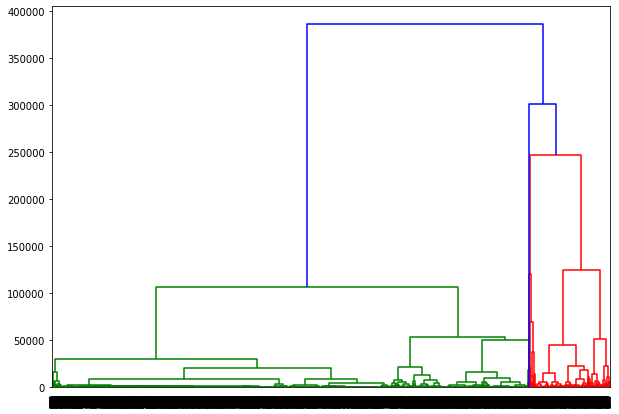

In [59]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,7))
plt.title('')
dend = shc.dendrogram(shc.linkage(noEnd[:10000], method='ward'))

In [72]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
result = cluster.fit_predict(noEnd[:10000])

In [73]:
result

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [124]:
data = noEnd[:10000]
data['result'] = result

In [125]:
result

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [126]:
data.iloc[cluster.fit_predict(data)==0,:].describe()

,Map Location,SSID,Avg. Session Throughput (Kbps),RSSI (dBm),seconds,result
count,1445.0,1445.000000,1445.000000,1445.000000,1445.000000,1445.0
mean,1.0,1.132180,166.048374,-63.395156,8556.066436,0.0
std,0.0,0.338804,448.258858,10.656997,6027.693242,0.0
min,1.0,1.000000,0.050000,-128.000000,3626.000000,0.0
25%,1.0,1.000000,2.100000,-68.000000,5130.000000,0.0
50%,1.0,1.000000,22.200000,-62.000000,6631.000000,0.0
75%,1.0,1.000000,127.700000,-57.000000,9415.000000,0.0
max,1.0,2.000000,5797.900000,-34.000000,84440.000000,0.0


In [127]:
data.iloc[cluster.fit_predict(data)==1,:].describe()

,Map Location,SSID,Avg. Session Throughput (Kbps),RSSI (dBm),seconds,result
count,8554.0,8554.000000,8554.000000,8554.000000,8554.000000,8554.0
mean,1.0,1.164484,112.779676,-66.926233,955.044073,1.0
std,0.0,0.370736,518.690340,14.108342,956.141928,0.0
min,1.0,1.000000,0.050000,-128.000000,54.000000,1.0
25%,1.0,1.000000,0.050000,-72.000000,301.000000,1.0
50%,1.0,1.000000,1.000000,-65.000000,602.000000,1.0
75%,1.0,1.000000,40.575000,-59.000000,1209.000000,1.0
max,1.0,2.000000,15592.100000,-34.000000,4556.000000,1.0


In [128]:
data.iloc[cluster.fit_predict(data)==2,:].describe()

,Map Location,SSID,Avg. Session Throughput (Kbps),RSSI (dBm),seconds,result
count,1.0,1.0,1.00,1.0,1.0,1.0
mean,1.0,2.0,0.05,-70.0,221412.0,2.0
std,NaN,NaN,NaN,NaN,NaN,NaN
min,1.0,2.0,0.05,-70.0,221412.0,2.0
25%,1.0,2.0,0.05,-70.0,221412.0,2.0
50%,1.0,2.0,0.05,-70.0,221412.0,2.0
75%,1.0,2.0,0.05,-70.0,221412.0,2.0
max,1.0,2.0,0.05,-70.0,221412.0,2.0


In [129]:
#dbscan

In [130]:
noEnd[:10000]

,Map Location,SSID,Avg. Session Throughput (Kbps),RSSI (dBm),seconds
6382081,1,1,1.40,-61,5426
6382082,1,1,1.10,-45,1205
6382083,1,1,40.00,-78,6632
6382084,1,1,0.80,-55,1205
6382085,1,1,4.80,-67,12359
...,...,...,...,...,...
6392076,1,1,0.70,-70,5439
6392077,1,1,85.30,-45,31753
6392078,1,1,0.05,-57,300
6392079,1,1,238.60,-66,2118


In [136]:
from sklearn.cluster import DBSCAN
data2 = noEnd[:10000]

model = DBSCAN(eps=0.3, min_samples=6)
predict = pd.DataFrame(model.fit_predict(data2))
predict.columns=['predict']

data2['predict'] = predict


In [142]:
data2['predict'] = list(predict['predict'])

In [143]:
data2

,Map Location,SSID,Avg. Session Throughput (Kbps),RSSI (dBm),seconds,predict
6382081,1,1,1.40,-61,5426,-1
6382082,1,1,1.10,-45,1205,-1
6382083,1,1,40.00,-78,6632,-1
6382084,1,1,0.80,-55,1205,-1
6382085,1,1,4.80,-67,12359,-1
...,...,...,...,...,...,...
6392076,1,1,0.70,-70,5439,-1
6392077,1,1,85.30,-45,31753,-1
6392078,1,1,0.05,-57,300,119
6392079,1,1,238.60,-66,2118,-1


In [152]:
# sns.pairplot(data2, hue='predict')
# plt.show()

In [158]:
data2.groupby(data2['predict']).describe()['RSSI (dBm)']

,count,mean,std,min,25%,50%,75%,max
predict,,,,,,,,
-1,7634.0,-64.607938,11.186365,-128.0,-70.0,-64.0,-58.0,-34.0
0,12.0,-128.000000,0.000000,-128.0,-128.0,-128.0,-128.0,-128.0
1,8.0,-79.000000,0.000000,-79.0,-79.0,-79.0,-79.0,-79.0
2,20.0,-58.000000,0.000000,-58.0,-58.0,-58.0,-58.0,-58.0
3,7.0,-52.000000,0.000000,-52.0,-52.0,-52.0,-52.0,-52.0
...,...,...,...,...,...,...,...,...
133,6.0,-58.000000,0.000000,-58.0,-58.0,-58.0,-58.0,-58.0
134,7.0,-62.000000,0.000000,-62.0,-62.0,-62.0,-62.0,-62.0
135,6.0,-57.000000,0.000000,-57.0,-57.0,-57.0,-57.0,-57.0


In [156]:
data2.groupby(data2['predict']).describe()['Avg. Session Throughput (Kbps)']

,count,mean,std,min,25%,50%,75%,max
predict,,,,,,,,
-1,7634.0,157.777109,5.779761e+02,0.05,0.60,9.700,100.5750,15592.10
0,12.0,0.050000,7.247438e-18,0.05,0.05,0.050,0.0500,0.05
1,8.0,0.050000,7.417990e-18,0.05,0.05,0.050,0.0500,0.05
2,20.0,0.057500,3.354102e-02,0.05,0.05,0.050,0.0500,0.20
3,7.0,0.050000,7.494862e-18,0.05,0.05,0.050,0.0500,0.05
...,...,...,...,...,...,...,...,...
133,6.0,0.175000,1.753568e-01,0.05,0.05,0.125,0.2000,0.50
134,7.0,0.057143,1.889822e-02,0.05,0.05,0.050,0.0500,0.10
135,6.0,0.050000,7.601177e-18,0.05,0.05,0.050,0.0500,0.05


In [159]:
data2.groupby(data2['predict']).describe()['seconds']

,count,mean,std,min,25%,50%,75%,max
predict,,,,,,,,
-1,7634.0,2614.782814,4724.952689,54.0,303.0,1205.0,3025.0,221412.0
0,12.0,301.000000,0.000000,301.0,301.0,301.0,301.0,301.0
1,8.0,301.000000,0.000000,301.0,301.0,301.0,301.0,301.0
2,20.0,301.000000,0.000000,301.0,301.0,301.0,301.0,301.0
3,7.0,602.000000,0.000000,602.0,602.0,602.0,602.0,602.0
...,...,...,...,...,...,...,...,...
133,6.0,604.000000,0.000000,604.0,604.0,604.0,604.0,604.0
134,7.0,302.000000,0.000000,302.0,302.0,302.0,302.0,302.0
135,6.0,302.000000,0.000000,302.0,302.0,302.0,302.0,302.0
